# **DS514/515 Final Project**

# หัวข้อ : **Toyota Used Car Price Prediction Project**

**สมาชิก:**
<br>1) ธนกร สอนเพ็ชร (ID: 68199160 **268**)
<br>2) จตุพร ตะเคียนทอง (ID : 68199160 **255**)
<br>3) อาภากร กาละ (ID : 68199160 **310**)
<br><br>
**Dataset:** 100,000 UK Used Car Data set (kaggle) <br>
**link Source:** https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

## **Import Packages**

In [ ]:
# 1.1 Data Manipulation
import pandas as pd
import numpy as np

# 1.2 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3 Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1.4 Machine Learning - Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# 1.5 Machine Learning - Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# data visualization
sns.set(style="whitegrid")
%matplotlib inline

## **Import Dataset**

In [ ]:
import pandas as pd
gitURL = 'https://raw.githubusercontent.com/thanakornsonphet-swu/ds514-515-toyota-used-car-price-prediction/refs/heads/main/toyota.csv'
df = pd.read_csv(gitURL)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


## **Explore Data Analysis**

In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
# เช็คข้อมูลสูญหาย (Missing Values)
print("Missing Values:\n", df.isnull().sum())

# เช็คข้อมูลซ้ำ (Duplicate Rows)
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# ถ้ามีข้อมูลซ้ำ ให้ลบทิ้ง (Best Practice)
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed duplicates. New shape: {df.shape}")

Missing Values:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Number of duplicate rows: 39
Removed duplicates. New shape: (6699, 9)


In [ ]:
# Descriptive Statistics
display(df.describe())


--- Descriptive Statistics ---


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


วิเคราะห์การกระจายตัวของราคา (Target Variable)

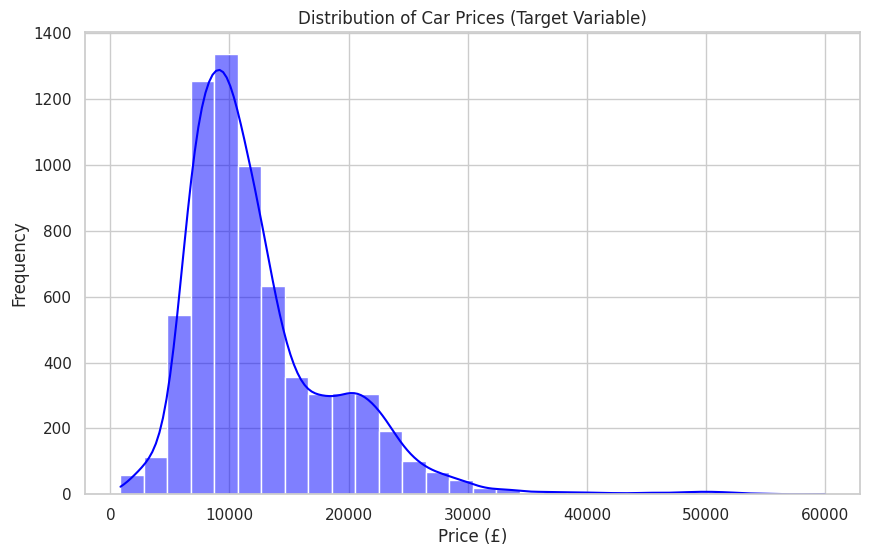

Skewness: 1.81


In [ ]:
# สร้าง Histogram ดูการกระจายตัวของราคา
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices (Target Variable)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# Insight: กราฟเบ้ขวา (Right Skewed) แสดงว่ารถส่วนใหญ่ราคาประหยัด
print(f"Skewness: {df['price'].skew():.2f}")

**วิเคราะห์ความสัมพันธ์ (Correlation Heatmap)**

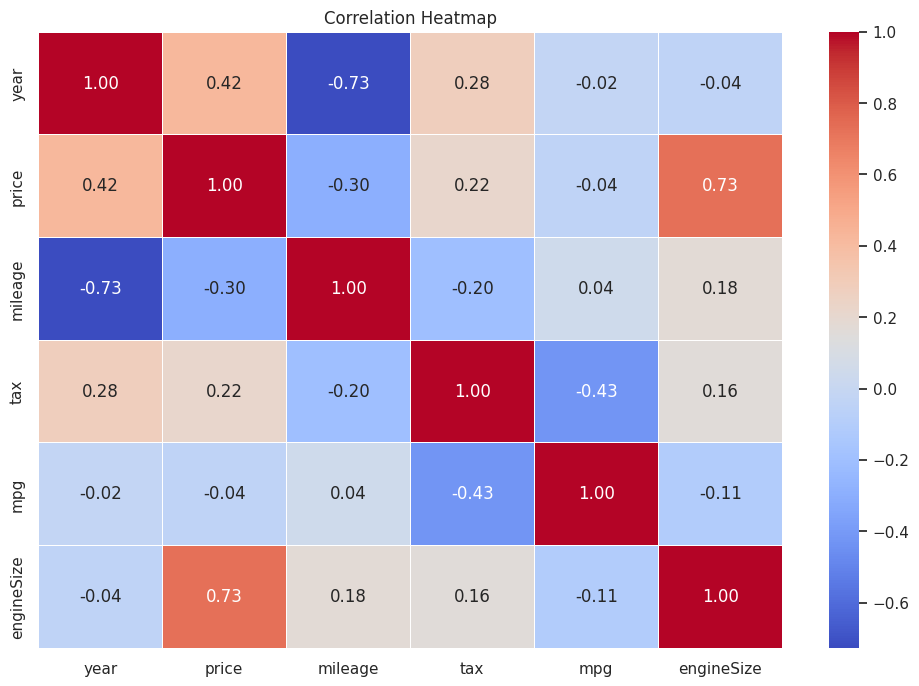

In [ ]:
# สร้าง Correlation Matrix
plt.figure(figsize=(12, 8))

# เลือกเฉพาะคอลัมน์ตัวเลข
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# วาด Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insight: เช็ค EngineSize vs Price (Positive) และ Mileage vs Price (Negative)

/tmp/ipython-input-3755961957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='engineSize', y='price', data=df, palette='viridis')


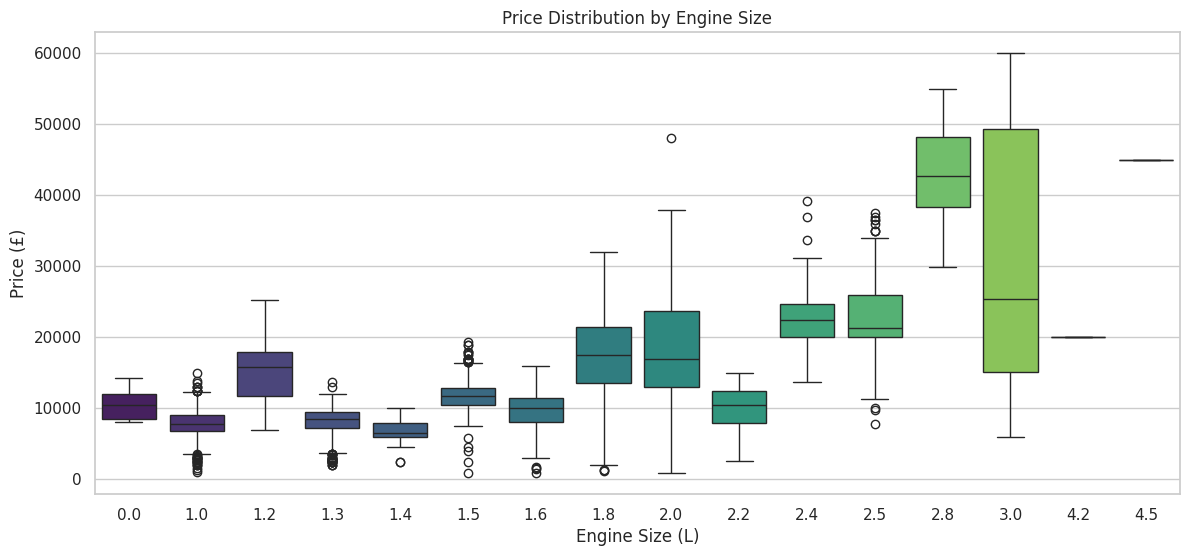

In [ ]:
# Boxplot: ราคาแบ่งตามขนาดเครื่องยนต์
plt.figure(figsize=(14, 6))
sns.boxplot(x='engineSize', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (£)')
plt.show()

## **Data pre-processing**

In [ ]:
# 1. กำหนด Feature (X) และ Target (y)
target_col = 'price' # ตัวแปรที่เราต้องการทำนาย
X = df.drop(target_col, axis=1) # ข้อมูลทั้งหมด ยกเว้นราคา
y = df[target_col] # ราคาอย่างเดียว

# 2. แบ่งข้อมูล Train 80% / Test 20%
# random_state=42 เพื่อล็อคผลการสุ่มให้เหมือนเดิมทุกครั้ง
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5359, 8)
Testing set size: (1340, 8)


In [ ]:
# 1. แยกชื่อคอลัมน์ตามประเภท
# คอลัมน์ตัวเลข (Numerical)
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# คอลัมน์หมวดหมู่ (Categorical)
categorical_features = ['model', 'transmission', 'fuelType']

# 2. สร้าง Transformers (ตัวแปลงข้อมูล)
# สำหรับตัวเลข: ปรับสเกลให้เป็นมาตรฐาน (StandardScaler)
numerical_transformer = StandardScaler()

# สำหรับข้อความ: แปลงเป็นตัวเลข 0/1 (OneHotEncoder)
# handle_unknown='ignore': ถ้าเจอหมวดหมู่แปลกๆ ในอนาคต ให้ข้ามไป ไม่ต้อง Error
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 3. รวมร่างเป็น ColumnTransformer (ตัวจัดการคอลัมน์)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ลองแสดงหน้าตา Pipeline
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['year', 'mileage', 'tax', 'mpg',
                                  'engineSize']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['model', 'transmission', 'fuelType'])])


## **Build Machine Learning Model**

Training Linear Models (Ridge, Lasso, Elastic Net)

In [ ]:
# --- 1. กำหนด Parameter Grid (ช่วงค่า Alpha ที่จะให้ AI ลองสุ่ม) ---
# Alpha คือความแรงในการบีบโมเดล (ยิ่งเยอะ ยิ่งบีบมาก)
alphas = [0.01, 0.1, 1, 10, 100]

# --- 2. สร้าง GridSearch สำหรับแต่ละโมเดล ---

# 2.1 Ridge Regression
print("Training Ridge...")
ridge_pipe = Pipeline([('prep', preprocessor), ('algo', Ridge())])
grid_ridge = GridSearchCV(ridge_pipe, {'algo__alpha': alphas}, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)

# 2.2 Lasso Regression
print("Training Lasso...")
lasso_pipe = Pipeline([('prep', preprocessor), ('algo', Lasso(max_iter=10000))])
grid_lasso = GridSearchCV(lasso_pipe, {'algo__alpha': alphas}, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

# 2.3 Elastic Net
print("Training Elastic Net...")
enet_pipe = Pipeline([('prep', preprocessor), ('algo', ElasticNet(max_iter=10000))])
# Elastic Net ต้องจูนทั้ง alpha และ l1_ratio (ผสม Lasso กี่ %)
grid_enet = GridSearchCV(enet_pipe,
                         {'algo__alpha': [0.01, 0.1, 1], 'algo__l1_ratio': [0.2, 0.5, 0.8]},
                         cv=5, scoring='r2', n_jobs=-1)
grid_enet.fit(X_train, y_train)

print("Linear Models Training Completed!")

Training Ridge...
Training Lasso...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687302961.5978298, tolerance: 21531744.89259817
  model = cd_fast.sparse_enet_coordinate_descent(


Training Elastic Net...
Linear Models Training Completed!


Evaluate Model: Linear Models (Ridge, Lasso, Elastic Net)

In [ ]:
# 1. ฟังก์ชันดึงค่าผลลัพธ์
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

# 2. คำนวณผลลัพธ์ของทั้ง 3 โมเดล
r2_ridge, rmse_ridge = get_metrics(grid_ridge.best_estimator_, X_test, y_test)
r2_lasso, rmse_lasso = get_metrics(grid_lasso.best_estimator_, X_test, y_test)
r2_enet, rmse_enet = get_metrics(grid_enet.best_estimator_, X_test, y_test)

# 3. สร้างตารางเปรียบเทียบ
results_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Elastic Net'],
    'R2 Score': [r2_ridge, r2_lasso, r2_enet],
    'RMSE (£)': [rmse_ridge, rmse_lasso, rmse_enet],
    'Best Params': [grid_ridge.best_params_, grid_lasso.best_params_, grid_enet.best_params_]
})

# แสดงตาราง (Order by RMSE asc)
display(results_df.sort_values(by='RMSE (£)'))

# 4. Best Model
best_row = results_df.loc[results_df['RMSE (£)'].idxmin()] # หาแถวที่ RMSE ต่ำที่สุด

print("-" * 50)
print(f"Best Model by RMSE: ** {best_row['Model']} **")
print(f"R2 Score: {best_row['R2 Score']:.4f}")
print(f"RMSE: £{best_row['RMSE (£)']:.2f}")
print(f"Best Params: {best_row['Best Params']}")
print("-" * 50)

# 5. ตรวจสอบกับเกณฑ์ธุรกิจ (Business Criteria)
## เป้าหมายธุรกิจ (Target RMSE): ต่ำกว่า £1250
## ผลสรุป: ไม่ผ่านเกณฑ์ (ยังขาดอีก £430.24)

,Model,R2 Score,RMSE (£),Best Params
1,Lasso,0.931804,1680.243154,{'algo__alpha': 0.01}
0,Ridge,0.931800,1680.285084,{'algo__alpha': 0.1}
2,Elastic Net,0.919481,1825.746414,"{'algo__alpha': 0.01, 'algo__l1_ratio': 0.8}"


--------------------------------------------------
Best Model by RMSE: ** Lasso **
R2 Score: 0.9318
RMSE: £1680.24
Best Params: {'algo__alpha': 0.01}
--------------------------------------------------


In [ ]:
# 1. สร้าง Pipeline
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# 2. กำหนด Parameter Grid
rf_params = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_leaf': [1, 2, 4]
}

# 3. เริ่ม GridSearch (เน้นหา RMSE ที่ต่ำที่สุดเป็นหลัก)
grid_rf = GridSearchCV(
    rf_pipe,
    rf_params,
    cv=5,
    scoring='neg_root_mean_squared_error', # Optimize หา RMSE ที่ต่ำที่สุด
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)


# Best RMSE
best_rmse_cv = -grid_rf.best_score_

# Best R2
best_model = grid_rf.best_estimator_
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
best_r2_cv = cv_r2_scores.mean()

print("-" * 60)
print(f"Best Params (ค่าจูนที่ดีที่สุด):")
print(f"   {grid_rf.best_params_}")
print("-" * 60)
print(f"Training Performance:")
print(f"Best CV Score (R² Accuracy):  {best_r2_cv:.4f}  (ความแม่นยำเฉลี่ย {best_r2_cv*100:.2f}%)")
print(f"Cross-Validation RMSE (Error): £{best_rmse_cv:.2f}")
print("-" * 60)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
------------------------------------------------------------
Best Params (ค่าจูนที่ดีที่สุด):
   {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}
------------------------------------------------------------
Training Performance:
Best CV Score (R² Accuracy):  0.9606  (ความแม่นยำเฉลี่ย 96.06%)
Cross-Validation RMSE (Error): £1255.63
------------------------------------------------------------


In [ ]:
# --- 5.3 Final Evaluation (เปรียบเทียบผลลัพธ์) ---

# 1. ดึงผลจาก Linear ที่ดีที่สุด
best_linear_model = grid_lasso.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)

# 2. ดึงผลจาก Random Forest ที่ดีที่สุด
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# 3. คำนวณค่า Error จริง (Test Set)
def get_final_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

rmse_lin, r2_lin, mae_lin = get_final_metrics(y_test, y_pred_linear)
rmse_rf, r2_rf, mae_rf = get_final_metrics(y_test, y_pred_rf)

# 4. สร้างตารางเปรียบเทียบ
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Error)', 'R2 Score (Accuracy)', 'MAE (Avg Error)'],
    'Linear Model (Lasso)': [rmse_lin, r2_lin, mae_lin],
    'Random Forest (Champion)': [rmse_rf, r2_rf, mae_rf]
})

# จัด Format ตัวเลข
pd.options.display.float_format = '{:,.2f}'.format
display(comparison_df)

# 5. ตัดสินผล
target = 1250
print("-" * 50)
print(f"(Target RMSE): ต่ำกว่า £{target}")
print(f"Random Forest (Test Set):   £{rmse_rf:.2f}")

,Metric,Linear Model (Lasso),Random Forest (Champion)
0,RMSE (Error),"1,680.24","1,102.96"
1,R2 Score (Accuracy),0.93,0.97
2,MAE (Avg Error),"1,102.26",749.55


--------------------------------------------------
(Target RMSE): ต่ำกว่า £1250
Random Forest (Test Set):   £1102.96


## **Summary**

## 📝 **Section 6: Summary & Business Recommendations**

### 1. Summary

* โปรเจกต์ **Toyota Used Car Price Prediction** จัดทำขึ้นเพื่อแก้ปัญหาการตั้งราคารถมือสองผิดพลาด ซึ่งส่งผลให้ยอดขายลดลงประมาณ **15%**
* **เป้าหมาย:** สร้างโมเดลที่ทำนายราคาได้อย่างแม่นยำ โดยตั้งเกณฑ์ **RMSE 1,250**
* **ผลลัพธ์:** จากการทดลอง พบว่าโมเดล **Random Forest** ให้ผลดีที่สุด
    * **Accuracy:** 96% ($R^2$)
    * **RMSE:** 1,102.96
    * **สรุป:** **ผ่านเกณฑ์ที่ตั้งไว้**

### **2. Model Comparison**

มีการทดสอบโมเดลทั้งหมด 2 แบบ ดังนี้:
- Linear Model (Lasso)
  RMSE ~ £1,768  
  ไม่สามารถจับความสัมพันธ์ที่ซับซ้อนของราคารถได้
- Random Forest
  RMSE = £1,102.96
  
  เรียนรู้รูปแบบราคาได้ดี โดยเฉพาะความแตกต่างของแต่ละ Segment

### 3. Key Insights

ปัจจัย 3 อันดับแรกที่ส่งผลต่อราคามากที่สุด (Feature Importance):

1.  **Engine Size (ขนาดเครื่องยนต์)**
    * แยกแยะระหว่างรถราคาประหยัดและรถหรูได้อย่างชัดเจน
2.  **Year (ปี)**
    * รถปีใหม่ราคาสูงกว่า แต่ราคาไม่ได้ลดลงในลักษณะเชิงเส้น (Non-linear)
3.  **Transmission (ระบบเกียร์)**
    * รถเกียร์ออโต้มีราคาสูงกว่าเกียร์ธรรมดา



### 4. Business Recommendations

* **นำไปใช้:** ใช้โมเดล **Random Forest** เป็นเครื่องมือช่วยในการตั้งราคา (Pricing Assistant)
* **การปฏิบัติงาน:** รถที่มีขนาดเครื่องยนต์ใหญ่ (Engine Size) ควรได้รับการตรวจสภาพอย่างละเอียดเป็นพิเศษก่อนการตั้งราคา
* **การบำรุงรักษาโมเดล:** ประเมินผลและปรับปรุงโมเดลทุกเดือน เพื่อให้ราคาที่ทำนายมีความทันสมัยกับสภาวะตลาดที่เปลี่ยนแปลงไป


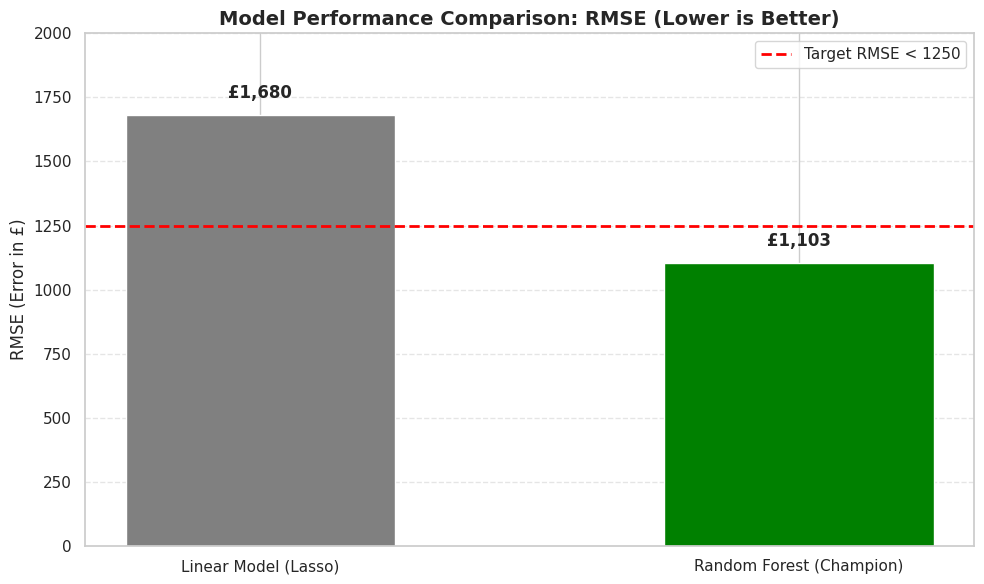

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ข้อมูลสำหรับการพล็อต
models = ['Linear Model (Lasso)', 'Random Forest (Champion)']
rmse_scores = [1680.24, 1102.96]
colors = ['grey', 'green']
plt.figure(figsize=(10, 6))

# สร้าง Bar Chart
bars = plt.bar(models, rmse_scores, color=colors, width=0.5)

# Target Line
target_line = 1250
plt.axhline(y=target_line, color='red', linestyle='--', linewidth=2, label=f'Target RMSE < {target_line}')

# ใส่ตัวเลขบนแท่งกราฟ
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'£{height:,.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# ตกแต่งกราฟ
plt.title('Model Performance Comparison: RMSE (Lower is Better)', fontsize=14, fontweight='bold')
plt.ylabel('RMSE (Error in £)', fontsize=12)
plt.ylim(0, 2000)  # ปรับความสูงแกน Y ให้สวยงาม
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# แสดงผล
plt.tight_layout()
plt.show()

In [ ]:
# สร้าง DataFrame สำหรับ Export
tableau_df = X_test.copy()
tableau_df['Actual_Price'] = y_test
tableau_df['Predicted_Price'] = y_pred_rf # ใช้ค่าจาก Random Forest
tableau_df['Error_Diff'] = tableau_df['Actual_Price'] - tableau_df['Predicted_Price']

# Save เป็น CSV
filename = 'toyota_final_prediction.csv'
tableau_df.to_csv(filename, index=False)
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>